In [16]:
from scipy import stats
import numpy as np
from prettytable import PrettyTable

In [17]:
def first4Moments(sample):

    n = len(sample)

    #mean
    mu_estimator = sum(sample)/n

    #remove the mean from the sample
    sam_zero_mean = sample - mu_estimator
    sample_sigma = sum(sam_zero_mean**2)/n

    #variance
    sigma_estimator = sample_sigma*n/(n-1)

    #skew
    skew_estimator = sum(sam_zero_mean**3)/n/np.sqrt(sample_sigma**3)

    #kurtosis
    kurt_estimator = sum(sam_zero_mean**4)/n/sample_sigma**2

    kurt_estimator -= 3

    return mu_estimator, sigma_estimator, skew_estimator, kurt_estimator

In [18]:
sample_size=1000
sample=stats.norm.rvs(size=sample_size)
mu_estimator, sigma_estimator, skew_estimator, kurt_estimator=first4Moments(sample)
moments_pkg=stats.describe(sample)

table=PrettyTable(['Moments','Excepted Value','Sample Estimator','Package Estimator','Difference'])
table.add_row(['Mean',0,mu_estimator,moments_pkg.mean,mu_estimator - moments_pkg.mean])
table.add_row(['Variance',1,sigma_estimator,moments_pkg.variance,sigma_estimator - moments_pkg.variance])
table.add_row(['Skewness',0,skew_estimator,moments_pkg.skewness,skew_estimator - moments_pkg.skewness])
table.add_row(['Kurtosis',0,kurt_estimator,moments_pkg.kurtosis,kurt_estimator - moments_pkg.kurtosis])
print(table)

+----------+----------------+----------------------+----------------------+------------------------+
| Moments  | Excepted Value |   Sample Estimator   |  Package Estimator   |       Difference       |
+----------+----------------+----------------------+----------------------+------------------------+
|   Mean   |       0        | 0.01804425543859344  | 0.018044255438593435 | 6.938893903907228e-18  |
| Variance |       1        |  1.026646872428238   |  1.0266468724282383  | -2.220446049250313e-16 |
| Skewness |       0        | -0.09657007310025213 | -0.09657007310025215 | 1.3877787807814457e-17 |
| Kurtosis |       0        | -0.21146250381027176 | -0.2114625038102682  | -3.552713678800501e-15 |
+----------+----------------+----------------------+----------------------+------------------------+


In [19]:
def ttest(moments,iter_times):
    t = np.sqrt(iter_times)*moments.mean/np.sqrt(moments.variance)
    p = 2*(1-stats.t.cdf(abs(t),df=iter_times-1))
    print("p-value : {}".format(p))

In [20]:
sample_size=4
iter_times=100
skew=np.zeros([iter_times,1])
kurt=np.zeros([iter_times,1])
for i in range(iter_times):
    sample=stats.norm.rvs(size=sample_size)
    skew[i]=stats.skew(sample)
    kurt[i]=stats.kurtosis(sample)

moments_skew=stats.describe(skew)
moments_kurt=stats.describe(kurt)
table=PrettyTable(['Moments','skew_pkg','kurt_pkg'])
table.add_row(['Mean',moments_skew.mean,moments_kurt.mean])
table.add_row(['Variance',moments_skew.variance,moments_kurt.variance])
print(table)

#stats.ttest_1samp(skew,popmean=0)
ttest(moments_skew,iter_times)
ttest(moments_kurt,iter_times)

+----------+---------------+---------------+
| Moments  |    skew_pkg   |    kurt_pkg   |
+----------+---------------+---------------+
|   Mean   | [-0.03826942] | [-1.19736983] |
| Variance |  [0.35822493] |  [0.11676713] |
+----------+---------------+---------------+
p-value : [0.52403828]
p-value : [0.]


In [21]:
sample_size=4
iter_times=100
skew_d=np.zeros([iter_times,1])
kurt_d=np.zeros([iter_times,1])
for i in range(iter_times):
    sample=stats.norm.rvs(size=sample_size)
    des=stats.describe(sample)
    skew_d[i]=des.skewness
    kurt_d[i]=des.kurtosis

moments_skew_d=stats.describe(skew_d)
moments_kurt_d=stats.describe(kurt_d)
table=PrettyTable(['Moments','skew_des','kurt_des'])
table.add_row(['Mean',moments_skew_d.mean,moments_kurt_d.mean])
table.add_row(['Variance',moments_skew_d.variance,moments_kurt_d.variance])
print(table)

ttest(moments_skew_d,iter_times)
ttest(moments_kurt_d,iter_times)

+----------+--------------+---------------+
| Moments  |   skew_des   |    kurt_des   |
+----------+--------------+---------------+
|   Mean   | [0.03960492] | [-1.22980787] |
| Variance | [0.35156288] |  [0.14691968] |
+----------+--------------+---------------+
p-value : [0.50571608]
p-value : [0.]


In [22]:
sample_size=10
iter_times=100
skew_my=np.zeros([iter_times,1])
kurt_my=np.zeros([iter_times,1])
for i in range(iter_times):
    sample=stats.norm.rvs(size=sample_size)
    _,_,skew_my[i],kurt_my[i]=first4Moments(sample)

moments_skew_my=stats.describe(skew_my)
moments_kurt_my=stats.describe(kurt_my)
table=PrettyTable(['Moments','skew_my','kurt_my'])
table.add_row(['Mean',moments_skew_my.mean,moments_kurt_my.mean])
table.add_row(['Variance',moments_skew_my.variance,moments_kurt_my.variance])
print(table)

#stats.ttest_1samp(skew,popmean=0)
ttest(moments_skew_my,iter_times)
ttest(moments_kurt_my,iter_times)

+----------+---------------+---------------+
| Moments  |    skew_my    |    kurt_my    |
+----------+---------------+---------------+
|   Mean   | [-0.04851761] | [-0.70367554] |
| Variance |  [0.27439797] |  [0.40516008] |
+----------+---------------+---------------+
p-value : [0.35658979]
p-value : [0.]


In [23]:
sample_size=4
iter_times=100
skew=np.zeros([iter_times,1])
kurt=np.zeros([iter_times,1])
skew_d=np.zeros([iter_times,1])
kurt_d=np.zeros([iter_times,1])
for i in range(iter_times):
    sample=stats.norm.rvs(size=sample_size)
    skew[i]=stats.skew(sample)
    kurt[i]=stats.kurtosis(sample)
    des=stats.describe(sample)
    skew_d[i]=des.skewness
    kurt_d[i]=des.kurtosis

moments_skew=stats.describe(skew)
moments_kurt=stats.describe(kurt)
moments_skew_d=stats.describe(skew_d)
moments_kurt_d=stats.describe(kurt_d)
table=PrettyTable(['Moments','skew_pkg','kurt_pkg','skew_des','kurt_des'])
table.add_row(['Mean',moments_skew.mean,moments_kurt.mean,moments_skew_d.mean,moments_kurt_d.mean])
table.add_row(['Variance',moments_skew.variance,moments_kurt.variance,moments_skew_d.variance,moments_kurt_d.variance])
print(table)

ttest(moments_skew,iter_times)
ttest(moments_kurt,iter_times)
ttest(moments_skew_d,iter_times)
ttest(moments_kurt_d,iter_times)

+----------+--------------+---------------+--------------+---------------+
| Moments  |   skew_pkg   |    kurt_pkg   |   skew_des   |    kurt_des   |
+----------+--------------+---------------+--------------+---------------+
|   Mean   | [-0.0800408] | [-1.18382294] | [-0.0800408] | [-1.18382294] |
| Variance | [0.33854935] |  [0.11553117] | [0.33854935] |  [0.11553117] |
+----------+--------------+---------------+--------------+---------------+
p-value : [0.17204184]
p-value : [0.]
p-value : [0.17204184]
p-value : [0.]


In [24]:
sample_size=4
iter_times=100
skew=np.zeros([iter_times,1])
kurt=np.zeros([iter_times,1])
skew_d=np.zeros([iter_times,1])
kurt_d=np.zeros([iter_times,1])
skew_my=np.zeros([iter_times,1])
kurt_my=np.zeros([iter_times,1])
for i in range(iter_times):
    sample=stats.norm.rvs(size=sample_size)
    skew[i]=stats.skew(sample,bias=False)
    kurt[i]=stats.kurtosis(sample,fisher=True,bias=False)
    des=stats.describe(sample,bias=False)
    skew_d[i]=des.skewness
    kurt_d[i]=des.kurtosis
    _,_,skew_my[i],kurt_my[i]=first4Moments(sample)

moments_skew=stats.describe(skew)
moments_kurt=stats.describe(kurt)
moments_skew_d=stats.describe(skew_d)
moments_kurt_d=stats.describe(kurt_d)
moments_skew_my=stats.describe(skew_my)
moments_kurt_my=stats.describe(kurt_my)
table=PrettyTable(['Moments','skew_pkg','kurt_pkg','skew_des','kurt_des','skew_my','kurt_my'])
table.add_row(['Mean',moments_skew.mean,moments_kurt.mean,moments_skew_d.mean,moments_kurt_d.mean,moments_skew_my.mean,moments_kurt_my.mean])
table.add_row(['Variance',moments_skew.variance,moments_kurt.variance,moments_skew_d.variance,moments_kurt_d.variance,moments_skew_my.variance,moments_kurt_my.variance])
print(table)

ttest(moments_skew,iter_times)
ttest(moments_kurt,iter_times)
ttest(moments_skew_d,iter_times)
ttest(moments_kurt_d,iter_times)
ttest(moments_skew_my,iter_times)
ttest(moments_kurt_my,iter_times)

+----------+--------------+---------------+--------------+---------------+--------------+--------------+
| Moments  |   skew_pkg   |    kurt_pkg   |   skew_des   |    kurt_des   |   skew_my    |   kurt_my    |
+----------+--------------+---------------+--------------+---------------+--------------+--------------+
|   Mean   | [0.06710378] | [-0.36427198] | [0.06710378] | [-0.36427198] | [0.03874239] | [-1.2485696] |
| Variance | [0.82772731] |  [7.29274228] | [0.82772731] |  [7.29274228] | [0.2759091]  | [0.12964875] |
+----------+--------------+---------------+--------------+---------------+--------------+--------------+
p-value : [0.4625203]
p-value : [0.18044586]
p-value : [0.4625203]
p-value : [0.18044586]
p-value : [0.4625203]
p-value : [0.]


In [25]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.formula.api as smf

In [26]:
from plot_pkg import Linear_Reg_Diagnostic

In [27]:
df=pd.read_csv("problem2.csv")
Y=df["y"]
x=df["x"]
X=sm.add_constant(x)
model = sm.OLS(Y,X)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     23.68
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           4.34e-06
Time:                        01:25:07   Log-Likelihood:                -159.99
No. Observations:                 100   AIC:                             324.0
Df Residuals:                      98   BIC:                             329.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1198      0.121      0.990      0.325      -0.120       0.360
x              0.6052      0.124      4.867      0.000       0.358       0.852
==============================================================================
Omnibus:                       14.146   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               43.673
Skew:                          -0.267   Prob(JB):                     3.28e-10
Kurtosis:                       6.193   Cond. No.                         1.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
import pandas as pd

  Features  VIF Factor
1        x         1.0
0    const         1.0


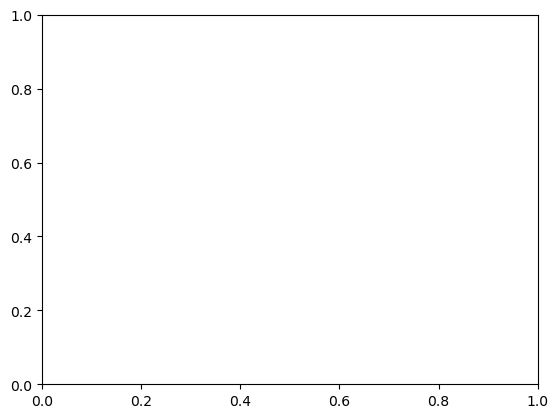

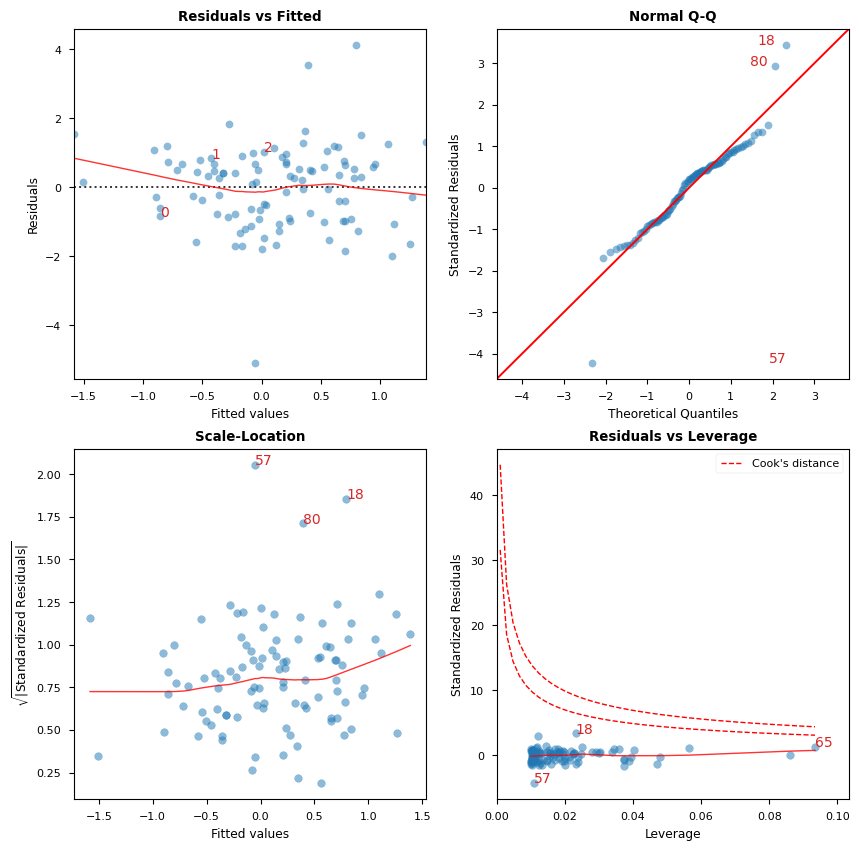

  Features  VIF Factor
1        x         1.0
0    const         1.0


In [29]:
cls = Linear_Reg_Diagnostic(res)
cls.vif_table()
cls = Linear_Reg_Diagnostic(res)
fig, ax = cls()

In [30]:
fig, ax = plt.subplots()
sns.histplot(data=res.resid, kde=True,stat='density',bins=40,color=sns.color_palette("pastel")[0],ax=ax)
ax.lines[0].set_color(sns.color_palette("Paired")[1])

NameError: name 'sns' is not defined

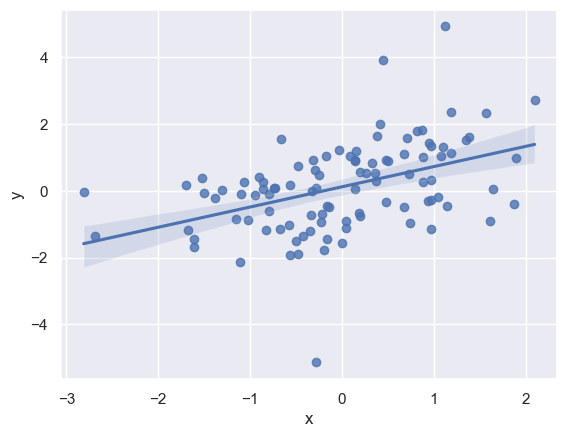

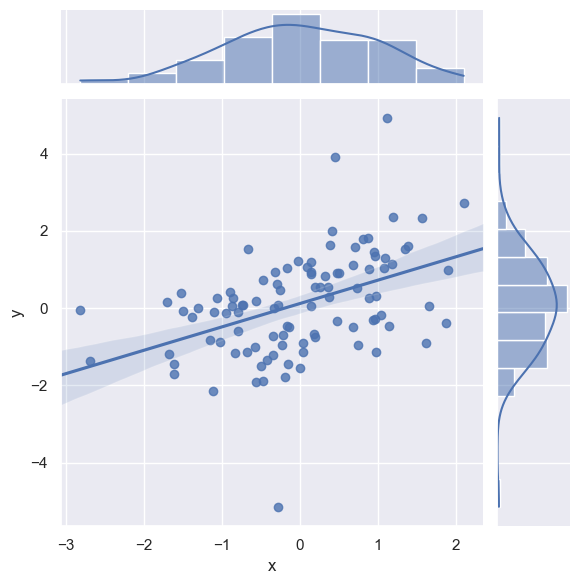

In [ ]:
sns.set_theme()
sns.regplot(x="x", y="y", data=df)
sns.jointplot(x="x", y="y", data=df,kind="reg", truncate=False )

In [ ]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import statsmodels.api as sm
import pandas as pd
import numpy as np
from statsmodels.base.model import GenericLikelihoodModel

In [ ]:
def _ll_t(y, X, beta, df, sigma):
    resid=y-np.dot(X, beta)
    ll = t.logpdf(resid, df, scale=sigma)
    return ll

class Tin(GenericLikelihoodModel):
    def __init__(self, endog, exog, **kwds):
        super().__init__(endog, exog, **kwds)

    def nloglikeobs(self, params):
        df = params[-2]
        sigma = params[-1]
        beta = params[:-2]
        ll = _ll_t(self.endog, self.exog, beta, df, sigma)
        return -ll

    def fit(self, start_params=None, maxiter=10000, maxfun=5000, **kwds):
        # we have three additional parameters and we need to add it for summary
        self.exog_names.append('df')
        self.exog_names.append('sigma')
        if start_params == None:
            # Reasonable starting values
            start_params = np.append(np.zeros(self.exog.shape[1]), np.array([50,1]))
            # intercept
            start_params[-3] = np.log(self.endog.mean())
        return super().fit(start_params=start_params,
                                     maxiter=maxiter, maxfun=maxfun,
                                     **kwds)
df=pd.read_csv("problem2.csv")
y = df.y
X = df[['x']].copy()
X["constant"] = 1
mod = Tin(y, X)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 1.554730
         Iterations: 370
         Function evaluations: 628
                                 Tin Results                                  
Dep. Variable:                      y   Log-Likelihood:                -155.47
Model:                            Tin   AIC:                             314.9
Method:            Maximum Likelihood   BIC:                             320.2
Date:                Fri, 27 Jan 2023                                         
Time:                        18:39:07                                         
No. Observations:                 100                                         
Df Residuals:                      98                                         
Df Model:                           1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

/Users/qijunyang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:2694: UserWarning: df_model + k_constant differs from nparams
  warnings.warn("df_model + k_constant differs from nparams")
/Users/qijunyang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:2696: UserWarning: df_resid differs from nobs - nparams
  warnings.warn("df_resid differs from nobs - nparams")


In [ ]:
def _ll_t(y, X, beta, df, mu, sigma):
    resid=y-np.dot(X, beta)
    ll = t.logpdf(resid, df, mu, sigma)
    return ll

In [ ]:
class Tin(GenericLikelihoodModel):
    def __init__(self, endog, exog, **kwds):
        super().__init__(endog, exog, **kwds)

    def nloglikeobs(self, params):
        df = params[-3]
        mu = params[-2]
        sigma = params[-1]
        beta = params[:-3]
        ll = _ll_t(self.endog, self.exog, beta, df, mu, sigma)
        return -ll

    def fit(self, start_params=None, maxiter=10000, maxfun=5000, **kwds):
        # we have three additional parameters and we need to add it for summary
        self.exog_names.append('df')
        self.exog_names.append('mu')
        self.exog_names.append('sigma')
        if start_params == None:
            # Reasonable starting values
            start_params = np.append(np.zeros(self.exog.shape[1]), np.array([10,0,1]))
            # intercept
            start_params[-4] = np.log(self.endog.mean())
        return super().fit(start_params=start_params,
                                     maxiter=maxiter, maxfun=maxfun,
                                     **kwds)

In [ ]:
df=pd.read_csv("problem2.csv")
y = df.y
X = df[['x']].copy()
X["constant"] = 1
mod = Tin(y, X)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 1.554730
         Iterations: 493
         Function evaluations: 800
                                 Tin Results                                  
Dep. Variable:                      y   Log-Likelihood:                -155.47
Model:                            Tin   AIC:                             314.9
Method:            Maximum Likelihood   BIC:                             320.2
Date:                Fri, 27 Jan 2023                                         
Time:                        18:00:06                                         
No. Observations:                 100                                         
Df Residuals:                      98                                         
Df Model:                           1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

/Users/qijunyang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:2694: UserWarning: df_model + k_constant differs from nparams
  warnings.warn("df_model + k_constant differs from nparams")
/Users/qijunyang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:2696: UserWarning: df_resid differs from nobs - nparams
  warnings.warn("df_resid differs from nobs - nparams")


In [ ]:
def _ll_norm(y, X, beta, sigma):
    resid=y-np.dot(X, beta)
    ll = norm.logpdf(resid, scale = sigma)
    return ll
    
class Normin(GenericLikelihoodModel):
    def __init__(self, endog, exog, **kwds):
        self.y=endog
        self.X=exog
        super().__init__(endog, exog, **kwds)

    def nloglikeobs(self, params):
        sigma = params[-1]
        beta = params[:-1]
        ll = _ll_norm(self.endog, self.exog, beta, sigma)
        return -ll

    def fit(self, start_params=None, maxiter=10000, maxfun=5000, **kwds):
        # we have three additional parameters and we need to add it for summary
        self.exog_names.append('sigma')
        if start_params == None:
            # Reasonable starting values
            start_params = np.append(np.zeros(self.exog.shape[1]), 1)
            # intercept
            start_params[-2] = np.log(self.endog.mean())
        self.res = super().fit(start_params=start_params,
                                     maxiter=maxiter, maxfun=maxfun,
                                     **kwds)
        return self.res

    def predict(self):
        y_pre=np.dot(self.X,self.res.params[:2])
        err=self.y-y_pre
        y_pre=pd.DataFrame(y_pre)
        err=pd.DataFrame(err)
        df=pd.concat([self.y,self.X.x,y_pre,err],axis=1)
        df.columns = ['y','x','y_pre','resid']
        return df

df=pd.read_csv("problem2.csv")
y = df.y
X = df[['x']].copy()
X["constant"] = 1
mod = Normin(y, X)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 1.599921
         Iterations: 137
         Function evaluations: 243
                                Normin Results                                
Dep. Variable:                      y   Log-Likelihood:                -159.99
Model:                         Normin   AIC:                             324.0
Method:            Maximum Likelihood   BIC:                             329.2
Date:                Fri, 27 Jan 2023                                         
Time:                        19:14:57                                         
No. Observations:                 100                                         
Df Residuals:                      98                                         
Df Model:                           1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

/Users/qijunyang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:2694: UserWarning: df_model + k_constant differs from nparams
  warnings.warn("df_model + k_constant differs from nparams")
/Users/qijunyang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:2696: UserWarning: df_resid differs from nobs - nparams
  warnings.warn("df_resid differs from nobs - nparams")


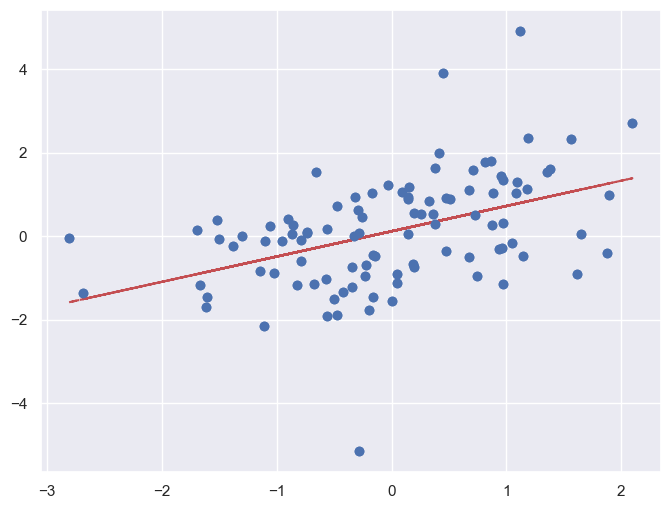

In [ ]:
df=mod.predict()
# fig, ax = plt.subplots()
# sns.relplot(data=df, x="x", y="y_pre",kind="line",ax=ax)
# sns.relplot(data=df, x="x", y="y",ax=ax)
# res.resid=df["resid"]
# plot_resid(res).plot(ax)
sns.set_theme()

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(df.x, df.y, 'bo')
ax.plot(df.x, df.y_pre, 'r--', label="normal distribution")
ax.plot(df.x, df.y, 'o', label="data")
ax.plot(data2.x, t_estimator.fitted_y(), 'g--', label="t distribution")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title("Fitted y Value")
ax.legend(loc='best')

In [ ]:
class plot_resid():
    def __init__(self,res):
        self.res=res
    def plot(self,ax):
        sns.histplot(data=self.res.resid, kde=True,stat='density',bins=40,color=sns.color_palette("pastel")[0],ax=ax)
        ax.lines[0].set_color(sns.color_palette("Paired")[1])
        ax.set_title('Residuals distribution', fontweight="bold")
        ax.set_xlabel('Residuals')
        ax.set_ylabel('Density')

In [ ]:
def _ll_norm(y, X, beta, mu, sigma):
    resid=y-np.dot(X, beta)
    ll = norm.logpdf(resid, mu, sigma)
    return ll

In [ ]:
class Normin(GenericLikelihoodModel):
    def __init__(self, endog, exog, **kwds):
        super().__init__(endog, exog, **kwds)

    def nloglikeobs(self, params):
        mu = params[-2]
        sigma = params[-1]
        beta = params[:-2]
        ll = _ll_norm(self.endog, self.exog, beta, mu, sigma)
        return -ll

    def fit(self, start_params=None, maxiter=10000, maxfun=5000, **kwds):
        # we have three additional parameters and we need to add it for summary
        self.exog_names.append('mu')
        self.exog_names.append('sigma')
        if start_params == None:
            # Reasonable starting values
            start_params = np.append(np.zeros(self.exog.shape[1]), np.array([0,1]))
            # intercept
            start_params[-3] = np.log(self.endog.mean())
        return super().fit(start_params=start_params,
                                     maxiter=maxiter, maxfun=maxfun,
                                     **kwds)

In [ ]:
df=pd.read_csv("problem2.csv")
y = df.y
X = df[['x']].copy()
X["constant"] = 1
mod = Normin(y, X)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 1.599921
         Iterations: 155
         Function evaluations: 274
                                Normin Results                                
Dep. Variable:                      y   Log-Likelihood:                -159.99
Model:                         Normin   AIC:                             324.0
Method:            Maximum Likelihood   BIC:                             329.2
Date:                Fri, 27 Jan 2023                                         
Time:                        18:16:13                                         
No. Observations:                 100                                         
Df Residuals:                      98                                         
Df Model:                           1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

/Users/qijunyang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:2694: UserWarning: df_model + k_constant differs from nparams
  warnings.warn("df_model + k_constant differs from nparams")
/Users/qijunyang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:2696: UserWarning: df_resid differs from nobs - nparams
  warnings.warn("df_resid differs from nobs - nparams")


In [ ]:
def _ll_norm(y, X, beta):
    resid=y-np.dot(X, beta)
    ll = norm.logpdf(resid)
    return ll
class Normin(GenericLikelihoodModel):
    def __init__(self, endog, exog, **kwds):
        super().__init__(endog, exog, **kwds)

    def nloglikeobs(self, params):
        beta = params
        ll = _ll_norm(self.endog, self.exog, beta)
        return -ll

    def fit(self, start_params=None, maxiter=10000, maxfun=5000, **kwds):
        # we have three additional parameters and we need to add it for summary
        if start_params == None:
            # Reasonable starting values
            start_params = np.zeros(self.exog.shape[1])
            # intercept
            start_params[-1] = np.log(self.endog.mean())
        return super().fit(start_params=start_params,
                                     maxiter=maxiter, maxfun=maxfun,
                                     **kwds)
df=pd.read_csv("problem2.csv")
y = df.y
X = df[['x']].copy()
X["constant"] = 1
mod = Normin(y, X)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 1.637013
         Iterations: 65
         Function evaluations: 123
                                Normin Results                                
Dep. Variable:                      y   Log-Likelihood:                -163.70
Model:                         Normin   AIC:                             331.4
Method:            Maximum Likelihood   BIC:                             336.6
Date:                Fri, 27 Jan 2023                                         
Time:                        18:27:49                                         
No. Observations:                 100                                         
Df Residuals:                      98                                         
Df Model:                           1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

In [ ]:
import statsmodels.api as sm
import numpy as np
from scipy import stats
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

In [ ]:
def simulate_AR1_process(alpha,beta,sigma,sample_size):
    ''' AR(1)
        y_t = alpha + beta*y_t-1 + e, e ~ N(0,sigma)
    '''
    x0=alpha/(1-beta)
    x=np.zeros(sample_size+1)
    x[0]=x0
    eps=stats.norm.rvs(size=sample_size,scale=sigma)
    for i in range(sample_size):
        x[i+1]=alpha+beta*x[i]+eps[i]
    return x

def simulate_AR2_process(alpha,beta,sigma,sample_size):
    ''' AR(2)
        y_t = alpha + beta[0]*y_t-1 + beta[1]*y_t-2 + e, e ~ N(0,sigma)
    '''
    x0=alpha/(1-sum(beta))
    eps=stats.norm.rvs(size=sample_size+1,scale=sigma)
    x=np.zeros(sample_size+2)
    x[0]=x0
    x[1]=x0+eps[0]
    for i in range(sample_size):
        x[i+2]=alpha+np.dot(beta,x[i:i+2])+eps[i+1]
    return x

def simulate_AR3_process(alpha,beta,sigma,sample_size):
    ''' AR(3)
        y_t = alpha + beta[0]*y_t-1 + beta[1]*y_t-2 + beta[2]*y_t-3 + e, e ~ N(0,sigma)
    '''
    x0=alpha/(1-sum(beta))
    eps=stats.norm.rvs(size=sample_size+2,scale=sigma)
    x=np.zeros(sample_size+3)
    x[0]=x0
    x[1]=x[0]+eps[0]
    x[2]=x[1]+eps[1]
    for i in range(sample_size):
        x[i+3]=alpha+np.dot(beta,x[i:i+3])+eps[i+2]
    return x

In [ ]:

# generate sample for AR(1)
alpha = 0.75
beta = 0.4
sigma = 0.8
sample_size = 5000
ar1_sample=simulate_AR1_process(alpha,beta,sigma,sample_size)

# generate sample for AR(2)
alpha = 0.75
beta = np.array([0.4,0.3])
sigma = 0.8
sample_size = 5000
ar2_sample=simulate_AR2_process(alpha,beta,sigma,sample_size)

# generate sample for AR(3)
alpha = 0.75
beta = np.array([0.2,0.3,0.2])
sigma = 0.8
sample_size = 5000
ar3_sample=simulate_AR3_process(alpha,beta,sigma,sample_size)

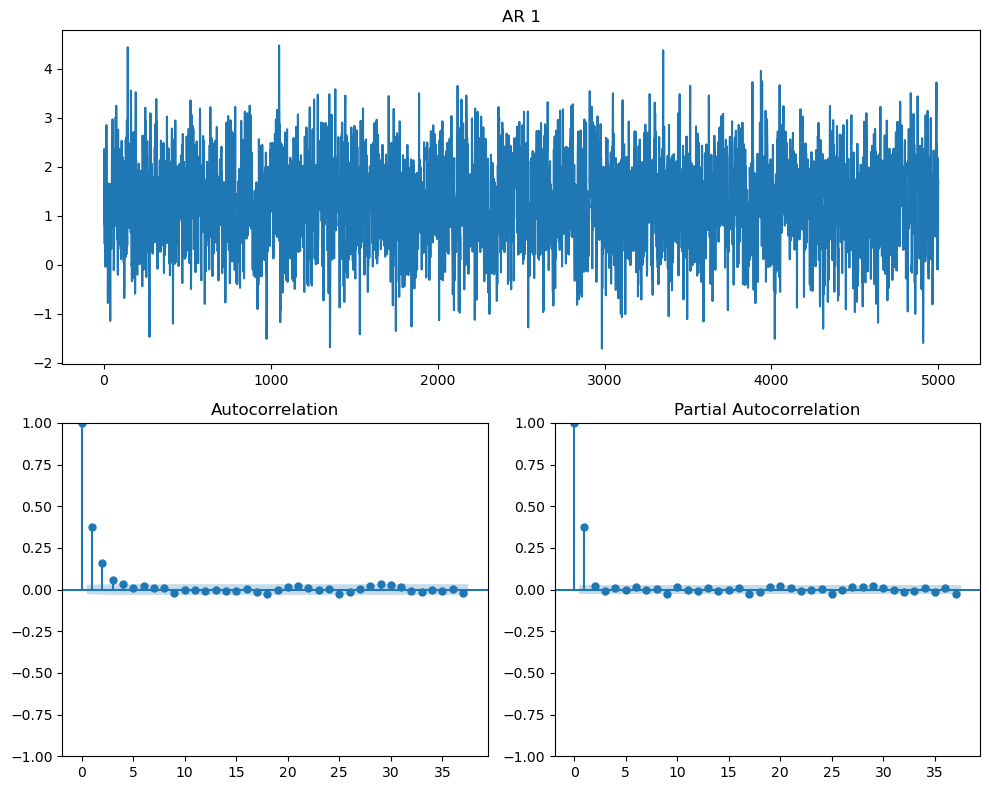

In [ ]:
# plot for AR(1)
fig = plt.figure(tight_layout=True,figsize=[10,8])
gs = gridspec.GridSpec(2, 2)

ax = fig.add_subplot(gs[0, :])
ax.plot(ar1_sample)
ax.set_title("AR 1")

ax = fig.add_subplot(gs[1, 0])
sm.graphics.tsa.plot_acf(ar1_sample,ax=ax)
ax = fig.add_subplot(gs[1, 1])
sm.graphics.tsa.plot_pacf(ar1_sample,method="ywm",ax=ax)
plt.show()


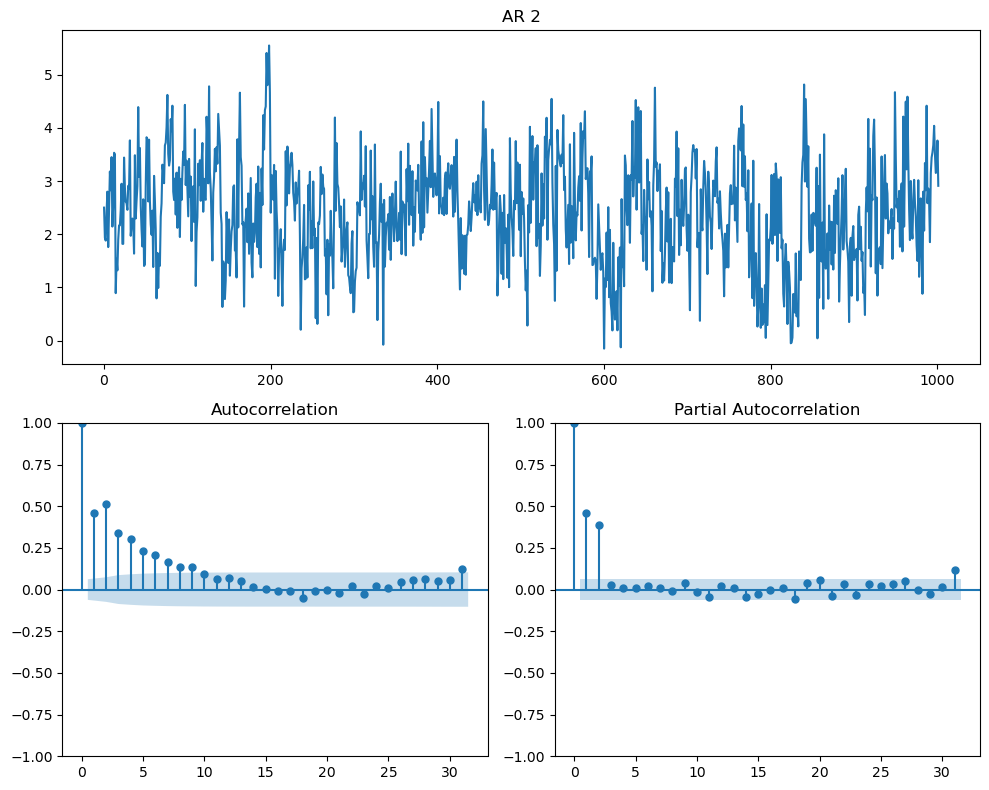

In [ ]:
# plot for AR(2)
fig = plt.figure(tight_layout=True,figsize=[10,8])
gs = gridspec.GridSpec(2, 2)

ax = fig.add_subplot(gs[0, :])
ax.plot(ar2_sample)
ax.set_title("AR 2")

ax = fig.add_subplot(gs[1, 0])
sm.graphics.tsa.plot_acf(ar2_sample,ax=ax)
ax = fig.add_subplot(gs[1, 1])
sm.graphics.tsa.plot_pacf(ar2_sample,method="ywm",ax=ax)
plt.show()

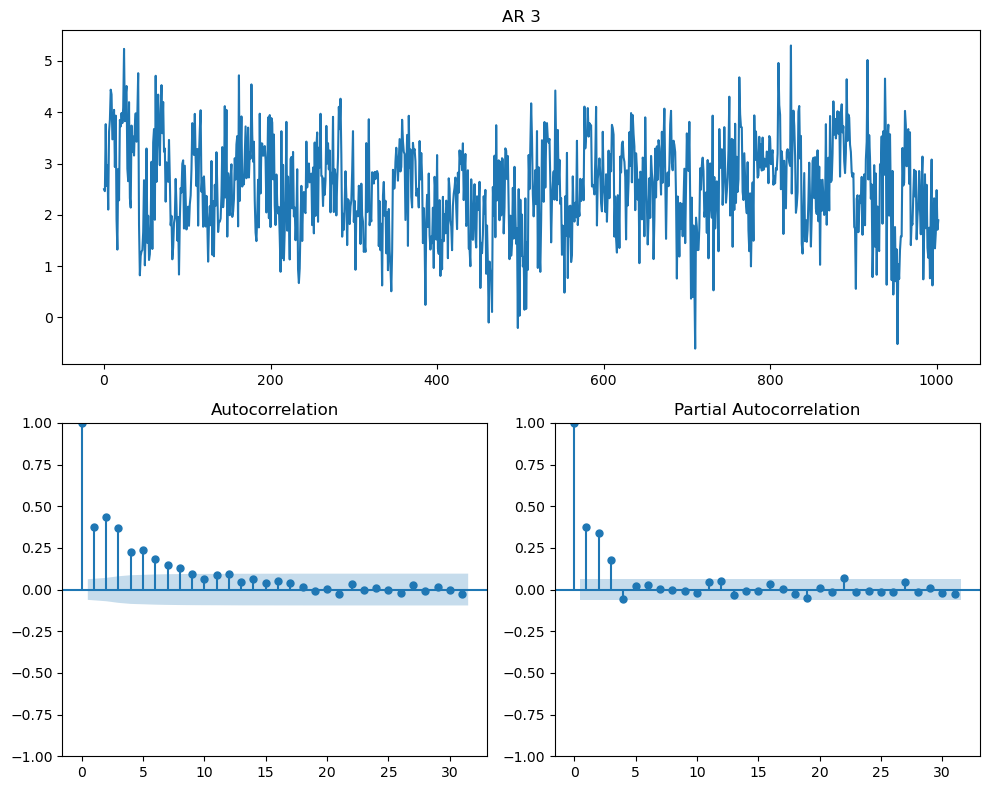

In [ ]:
# plot for AR(3)
fig = plt.figure(tight_layout=True,figsize=[10,8])
gs = gridspec.GridSpec(2, 2)

ax = fig.add_subplot(gs[0, :])
ax.plot(ar3_sample)
ax.set_title("AR 3")

ax = fig.add_subplot(gs[1, 0])
sm.graphics.tsa.plot_acf(ar3_sample,ax=ax)
ax = fig.add_subplot(gs[1, 1])
sm.graphics.tsa.plot_pacf(ar3_sample,method="ywm",ax=ax)
plt.show()

In [41]:
def simulate_MA1_process(alpha,beta,sigma,sample_size):
    ''' MA(1)
        y_t = alpha + e_t + beta*e_t-1, e ~ N(0,sigma)
    '''
    x0=alpha
    x=np.zeros(sample_size+1)
    x[0]=x0
    eps=stats.norm.rvs(size=sample_size+1,scale=sigma)
    for i in range(sample_size):
        x[i+1]=alpha+eps[i+1]+beta*eps[i]
    return x

def simulate_MA2_process(alpha,beta,sigma,sample_size):
    ''' MA(2)
        y_t = alpha + e_t + beta[0]*e_t-1 + beta[1]*e_t-2, e ~ N(0,sigma)
    '''
    x0=alpha
    eps=stats.norm.rvs(size=sample_size+2,scale=sigma)
    x=np.zeros(sample_size+2)
    x[0]=x0
    x[1]=x0
    for i in range(sample_size):
        x[i+2]=alpha+eps[i+2]+np.dot(beta,eps[i:i+2][::-1])
    return x

def simulate_MA3_process(alpha,beta,sigma,sample_size):
    ''' MA(3)
        y_t = alpha + e_t + beta[0]*e_t-1 + beta[1]*e_t-2 + beta[2]*e_t-3, e ~ N(0,sigma)
    '''
    x0=alpha
    eps=stats.norm.rvs(size=sample_size+3,scale=sigma)
    x=np.zeros(sample_size+3)
    x[0]=x0
    x[1]=x[0]
    x[2]=x[0]
    for i in range(sample_size):
        x[i+3]=alpha+eps[i+3]+np.dot(beta,eps[i:i+3][::-1])
    return x

In [42]:
# generate sample for MA(1)
alpha = 0.75
beta = 0.4
sigma = 0.8
sample_size = 5000
ma1_sample=simulate_MA1_process(alpha,beta,sigma,sample_size)

# generate sample for MA(2)
alpha = 0.75
beta = np.array([0.4,0.3])
sigma = 0.8
sample_size = 5000
ma2_sample=simulate_MA2_process(alpha,beta,sigma,sample_size)

# generate sample for MA(3)
alpha = 0.75
beta = np.array([0.2,0.3,0.2])
sigma = 0.8
sample_size = 5000
ma3_sample=simulate_MA3_process(alpha,beta,sigma,sample_size)

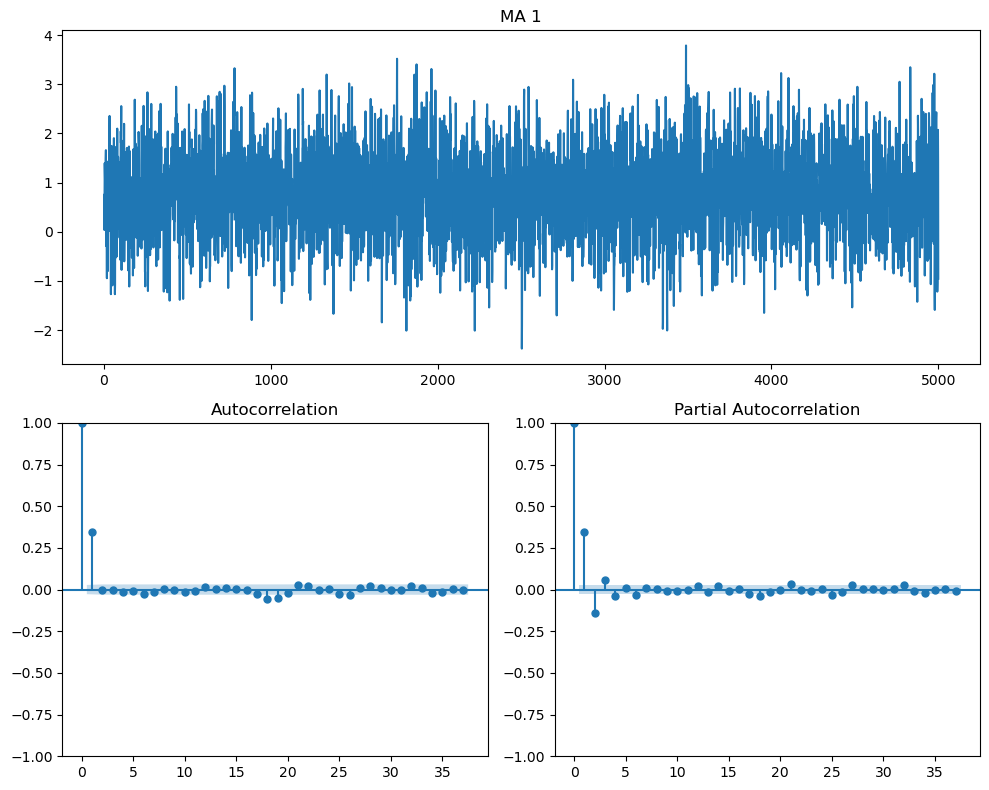

In [43]:
# plot for AR(1)
fig = plt.figure(tight_layout=True,figsize=[10,8])
gs = gridspec.GridSpec(2, 2)

ax = fig.add_subplot(gs[0, :])
ax.plot(ma1_sample)
ax.set_title("MA 1")

ax = fig.add_subplot(gs[1, 0])
sm.graphics.tsa.plot_acf(ma1_sample,ax=ax)
ax = fig.add_subplot(gs[1, 1])
sm.graphics.tsa.plot_pacf(ma1_sample,method="ywm",ax=ax)
plt.show()

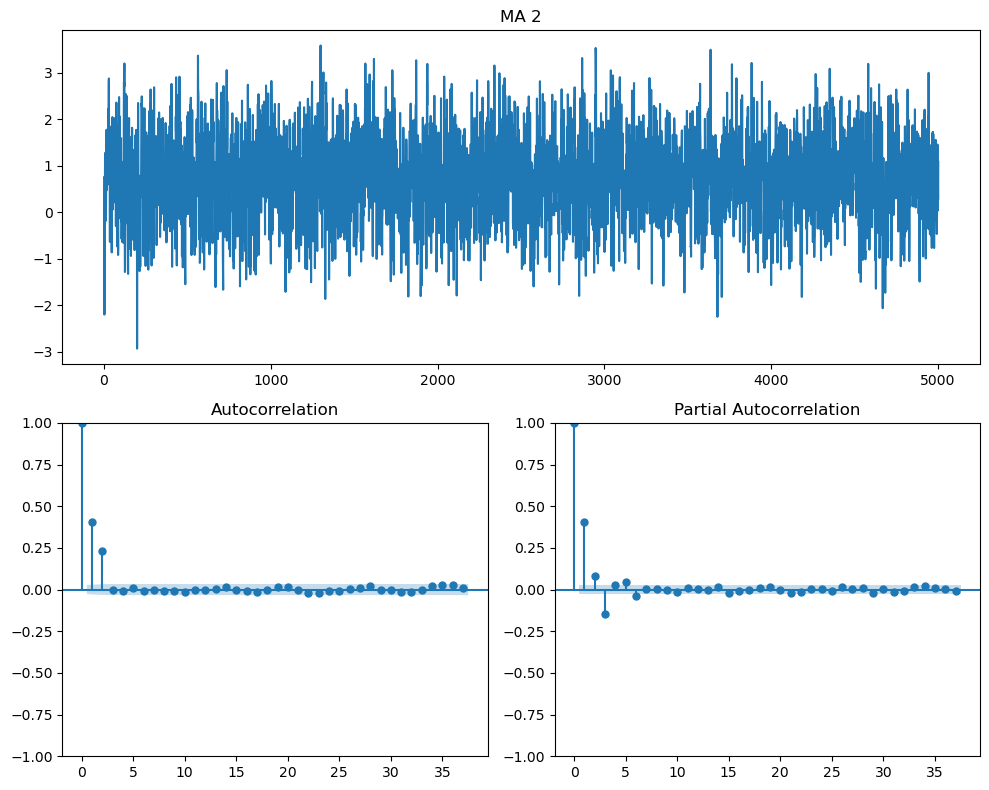

In [44]:
# plot for MA(2)
fig = plt.figure(tight_layout=True,figsize=[10,8])
gs = gridspec.GridSpec(2, 2)

ax = fig.add_subplot(gs[0, :])
ax.plot(ma2_sample)
ax.set_title("MA 2")

ax = fig.add_subplot(gs[1, 0])
sm.graphics.tsa.plot_acf(ma2_sample,ax=ax)
ax = fig.add_subplot(gs[1, 1])
sm.graphics.tsa.plot_pacf(ma2_sample,method="ywm",ax=ax)
plt.show()

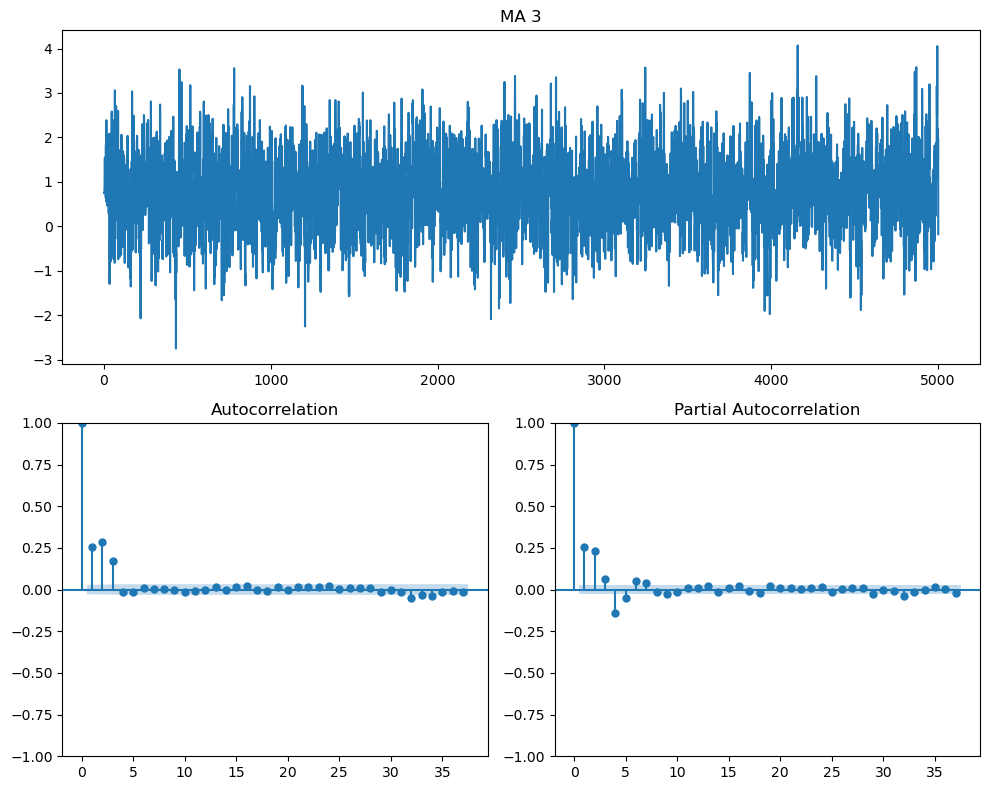

In [ ]:
# plot for MA(3)
fig = plt.figure(tight_layout=True,figsize=[10,8])
gs = gridspec.GridSpec(2, 2)

ax = fig.add_subplot(gs[0, :])
ax.plot(ma3_sample)
ax.set_title("MA 3")

ax = fig.add_subplot(gs[1, 0])
sm.graphics.tsa.plot_acf(ma3_sample,ax=ax)
ax = fig.add_subplot(gs[1, 1])
sm.graphics.tsa.plot_pacf(ma3_sample,method="ywm",ax=ax)
plt.show()

In [ ]:
import statsmodels.api as sm
import numpy as np
import statsmodels
np.random.seed(12345)

arparams = np.array([])
maparams = np.array([0.7,0.3,5])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
arma_process = sm.tsa.ArmaProcess(ar, ma)
y = arma_process.generate_sample(5000)


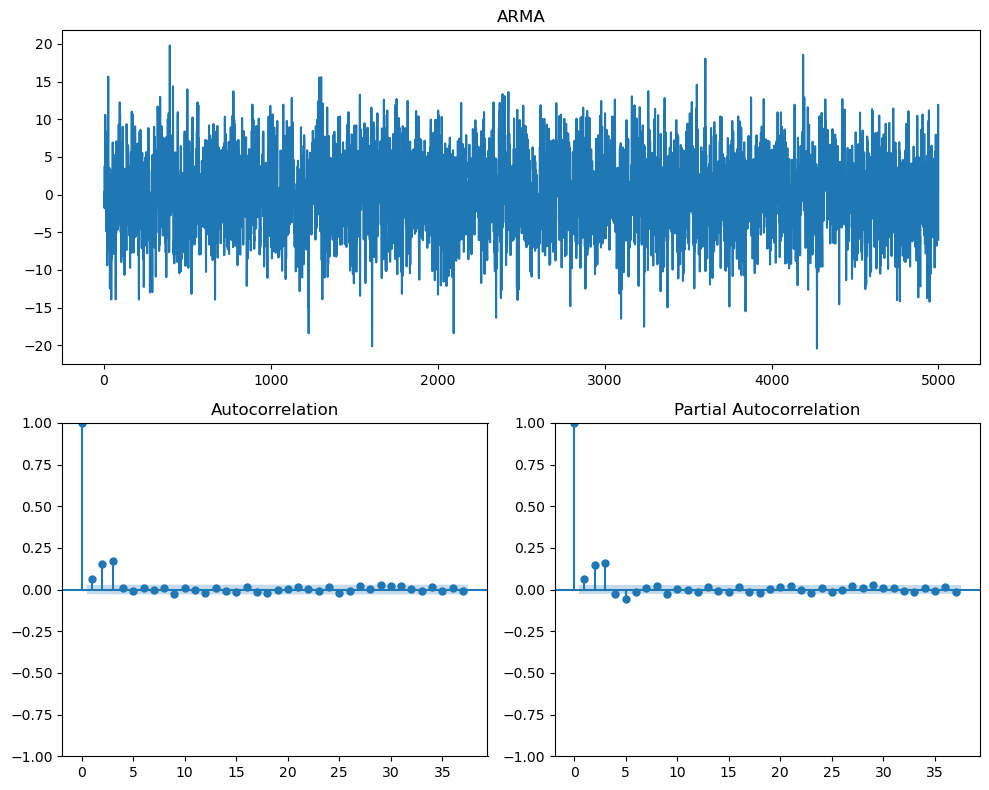

In [ ]:
fig = plt.figure(tight_layout=True,figsize=[10,8])
gs = gridspec.GridSpec(2, 2)

ax = fig.add_subplot(gs[0, :])
ax.plot(y)
ax.set_title("ARMA")

ax = fig.add_subplot(gs[1, 0])
sm.graphics.tsa.plot_acf(y,ax=ax)
ax = fig.add_subplot(gs[1, 1])
sm.graphics.tsa.plot_pacf(y,method="ywm",ax=ax)
plt.show()

In [ ]:
print(statsmodels.tsa.stattools.acf(y))
statsmodels.tsa.stattools.pacf(y)

[ 1.          0.43800738  0.10157262  0.04053342  0.01858937 -0.03442558
 -0.089242   -0.04760503  0.01697049  0.03329272 -0.00681704 -0.03156304
 -0.07322079 -0.05799499 -0.04752787 -0.00416524  0.02736785 -0.00230262
 -0.08858241 -0.08353674 -0.09703151 -0.14126132 -0.1140311  -0.05194633]


array([ 1.        ,  0.43976644, -0.11282191,  0.05089842, -0.01221507,
       -0.04940226, -0.06696088,  0.02687947,  0.03563028,  0.0141402 ,
       -0.03507672, -0.02423664, -0.07572985,  0.00439001, -0.02107922,
        0.04197202,  0.01587085, -0.04067312, -0.11603103, -0.00831934,
       -0.07947336, -0.08479052, -0.01426466, -0.00105727])

In [ ]:
print(statsmodels.tsa.stattools.acf(ar1_sample))
statsmodels.tsa.stattools.pacf(ar1_sample)

[ 1.          0.36716204  0.16220103  0.00402794  0.00442475 -0.01672568
 -0.01647195 -0.01773265 -0.0467623  -0.07609382 -0.05025454 -0.02354647
 -0.0035802   0.01842228  0.04153196  0.00864202 -0.03293925 -0.03481873
 -0.01111362  0.02674178  0.00160646 -0.0541765  -0.00856179 -0.01404564
  0.01936696  0.02115405  0.00517092 -0.01901459 -0.01718358  0.00581608
 -0.03979362]


array([ 1.        ,  0.3675292 ,  0.0317347 , -0.07576025,  0.02479327,
       -0.01630216, -0.01096626, -0.00542289, -0.0440742 , -0.05263908,
        0.00180803,  0.00332169,  0.00174618,  0.02047737,  0.03044003,
       -0.02542409, -0.04256817, -0.00963323,  0.00884078,  0.03253787,
       -0.0243712 , -0.06550972,  0.0466058 , -0.00971491,  0.01988476,
        0.0088264 , -0.02092175, -0.02094718,  0.00188702,  0.01729681,
       -0.06047067])

In [ ]:
np.random.seed(12345)
arparams = np.array([])
maparams = np.array([.4])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
y = sm.tsa.arma_generate_sample(ar, ma, 5000)

model = sm.tsa.ARIMA(y, order=(0, 0,1), trend='n').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -7066.289
Date:                Mon, 30 Jan 2023   AIC                          14136.578
Time:                        23:52:48   BIC                          14149.612
Sample:                             0   HQIC                         14141.146
                               - 5000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3710      0.013     28.487      0.000       0.345       0.397
sigma2         0.9887      0.020     50.037      0.000       0.950       1.027
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 0.24
Prob(Q):                              0.83   Prob(JB):                         0.89
Heteroskedasticity (H):               0.97   Skew:                            -0.02
Prob(H) (two-sided):                  0.60   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
import statsmodels.api as sm
import numpy as np
from scipy import stats
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import statsmodels

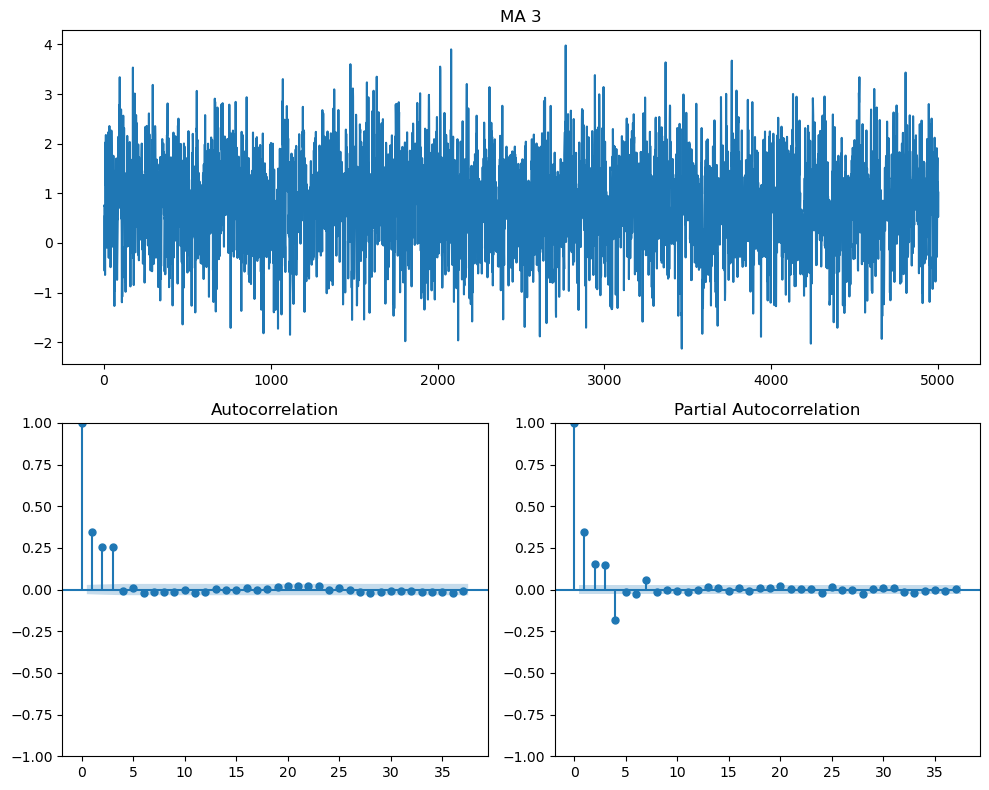

In [40]:
def simulate_MA3_process(alpha,beta,sigma,sample_size):
    ''' MA(3)
        y_t = alpha + e_t + beta[0]*e_t-1 + beta[1]*e_t-2 + beta[2]*e_t-3, e ~ N(0,sigma)
    '''
    x0=alpha
    eps=stats.norm.rvs(size=sample_size+3,scale=sigma)
    x=np.zeros(sample_size+3)
    x[0]=x0
    x[1]=x[0]
    x[2]=x[0]
    for i in range(sample_size):
        x[i+3]=alpha+eps[i+3]+np.dot(beta,eps[i:i+3][::-1])
    return x
    
# generate sample for MA(3)
alpha = 0.75
beta = np.array([0.3,0.2,0.3])
sigma = 0.8
sample_size = 5000
ma3_sample=simulate_MA3_process(alpha,beta,sigma,sample_size)

# plot for MA(3)
fig = plt.figure(tight_layout=True,figsize=[10,8])
gs = gridspec.GridSpec(2, 2)

ax = fig.add_subplot(gs[0, :])
ax.plot(ma3_sample)
ax.set_title("MA 3")

ax = fig.add_subplot(gs[1, 0])
sm.graphics.tsa.plot_acf(ma3_sample,ax=ax)
ax = fig.add_subplot(gs[1, 1])
sm.graphics.tsa.plot_pacf(ma3_sample,method="ywm",ax=ax)
plt.show()


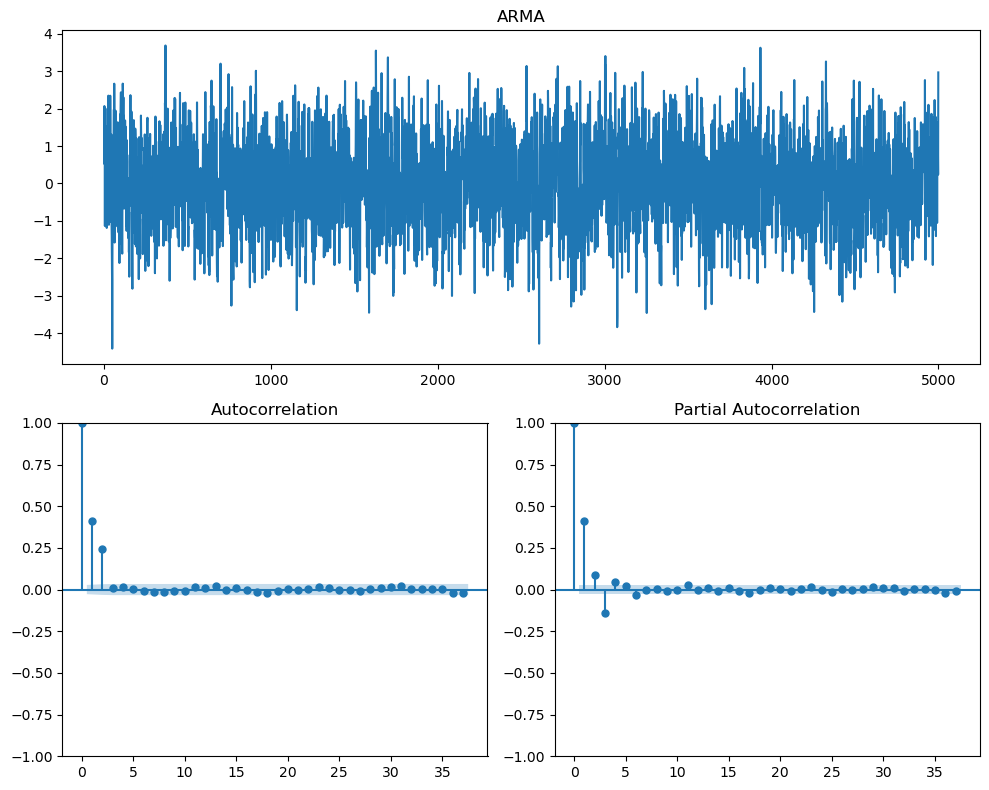

In [47]:
arparams = np.array([])
maparams = np.array([0.4,0.3])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
arma_process = sm.tsa.ArmaProcess(ar, ma)
y = arma_process.generate_sample(5000)

fig = plt.figure(tight_layout=True,figsize=[10,8])
gs = gridspec.GridSpec(2, 2)

ax = fig.add_subplot(gs[0, :])
ax.plot(y)
ax.set_title("ARMA")

ax = fig.add_subplot(gs[1, 0])
sm.graphics.tsa.plot_acf(y,ax=ax)
ax = fig.add_subplot(gs[1, 1])
sm.graphics.tsa.plot_pacf(y,method="ywm",ax=ax)
plt.show()